# Derrick Rose

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import requests

%matplotlib inline

In [7]:
u_a = "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.87 Safari/537.36"

def playergamelogs(PlayerID,DateFrom='',DateTo='',GameSegment='',LastNGames='0',LeagueID='00',
                   Location='',MeasureType='Base',Month='0',OpponentTeamID='0',Outcome='',
                   PORound='0',PaceAdjust='N',PerMode='Totals',Period='0',
                   PlusMinus='N',Rank='N',Season='2018-19',
                   SeasonSegment='',SeasonType='Regular Season',ShotClockRange='',
                   VsConference='',VsDivision=''):
    url = 'https://stats.nba.com/stats/playergamelogs?'
    api_param = {
        'DateFrom' : DateFrom,
        'DateTo' : DateTo,
        'GameSegment' : GameSegment,
        'LastNGames' : LastNGames,
        'LeagueID' : LeagueID,
        'Location' : Location,
        'MeasureType' : MeasureType,
        'Month' : Month,
        'OpponentTeamID' : OpponentTeamID,
        'Outcome' : Outcome,
        'PORound' : PORound,
        'PaceAdjust' : PaceAdjust,
        'PerMode' : PerMode,
        'Period' : Period,
        'PlayerID' : PlayerID,
        'PlusMinus' : PlusMinus,
        'Rank' : Rank,
        'Season' : Season,
        'SeasonSegment' : SeasonSegment,
        'SeasonType' : SeasonType,
        'ShotClockRange' : ShotClockRange,
        'VsConference' : VsConference,
        'VsDivision' : VsDivision,
        }
    response = requests.get(url,params=api_param,headers={"USER-AGENT":u_a})
    data = response.json()
    return pd.DataFrame(data['resultSets'][0]['rowSet'],columns=data['resultSets'][0]['headers'])

def seasons_string(start,end):
    '''
    creates a list of NBA seasons from start-end
    '''
    years = np.arange(start,end+1)
    seasons = []
    for year in years:
        string1 = str(year)
        string2 = str(year+1)
        season = '{}-{}'.format(string1,string2[-2:])
        seasons.append(season)
    return seasons

In [105]:
plt.style.use('classic')

def nice_plot(xlabel='',ylabel='',title='',subtitle='',
              name = 'By: DoingTheDishes',source = 'NBA.COM',
              figsize=(1.33*8,8),bg_color='white'):
    
    fig = plt.figure(figsize=figsize)

    fig.set_facecolor(bg_color)
    
    # create labels and title for figure
    fig.text(0.01,0.01,name,fontsize=14.0,color='gray',
             horizontalalignment='left',verticalalignment='bottom')
    fig.text(0.99,0.01,'Source: '+source,fontsize=14.0,color='gray',
             horizontalalignment='right',verticalalignment='bottom')

    fig.text(0.01,0.99,title,fontsize=22.0,
            horizontalalignment='left',weight="bold",verticalalignment='top')
    
    fig.text(0.01,0.93,subtitle,transform=fig.transFigure,fontsize=16.0,
            horizontalalignment='left',verticalalignment='top')

    fig.text(0.53,0.048,xlabel,fontsize=16.0,color='black',
                   horizontalalignment='center',verticalalignment='center')
    
    fig.text(0.03,0.495,ylabel,fontsize=16.0,color='black',
                   horizontalalignment='center',verticalalignment='center',rotation=90)

    ax_left = 0.1
    ax_bottom = 0.12
    ax_width = 0.85
    ax_height = 0.8
        
    ax = fig.add_axes([ax_left,ax_bottom,ax_width,ax_height])
    ax.set_facecolor(bg_color)   
    #ax.grid('on', linestyle='--',color='gray')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axes.tick_params(length=0)
    ax.tick_params(labelsize=16)
    
    return fig,ax

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']

### Get Data:

In [106]:
rose_id = 201565

In [15]:
data = []
for season in seasons_string(2008,2018):
    data.append(playergamelogs(rose_id,Season=season))
    print(season)
    time.sleep(1.0)

2008-09
2009-10
2010-11
2011-12
2012-13
2013-14
2014-15
2015-16
2016-17
2017-18
2018-19


In [16]:
data = pd.concat(data,ignore_index=True)

### Data cleaning

In [18]:
data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
data['PTS'] = pd.to_numeric(data['PTS'])
data = data.sort_values(by='GAME_DATE')
data = data.set_index('GAME_DATE')

In [42]:
import matplotlib.dates as mdates

Season averages

In [65]:
season_avg = data.groupby('SEASON_YEAR')['PTS'].mean()

Prepare season averages data for plotting

In [86]:
import datetime as dt
x2 = [dt.datetime(2009,2,1),dt.datetime(2010,2,1),dt.datetime(2011,2,1),
     dt.datetime(2012,2,1),dt.datetime(2013,11,1),
     dt.datetime(2015,2,1),dt.datetime(2016,2,1),dt.datetime(2017,2,1),
     dt.datetime(2018,2,1),dt.datetime(2018,10,20)]
y2 = season_avg.tolist()

### Plot data:

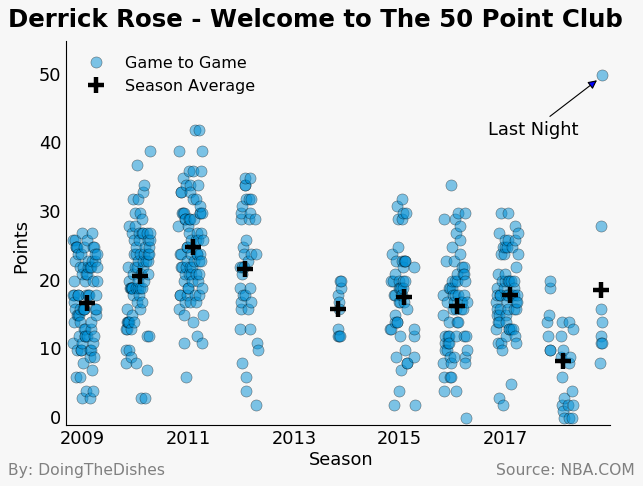

In [114]:
fig,ax = nice_plot(xlabel='Season',ylabel='Points',
                   title='Derrick Rose - Welcome to The 50 Point Club',subtitle='',
                  name = 'By: DoingTheDishes',source = 'NBA.COM',
                  figsize=(8,6),bg_color=(0.97,0.97,0.97))

x = data.index
ax.plot_date(data.index,data['PTS'],'o',alpha=0.5,markersize=10,color=colors[0],label='Game to Game')
ax.annotate('Last Night', (mdates.date2num(x[-1])-25, 49.5), xytext=(-100, -50),fontsize=16, 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.set_xlim([mdates.date2num(x[0])-50,mdates.date2num(x[-1])+50])
ax.set_ylim([-1,55])
ax.set_xticklabels(['2009','','2011','','2013','','2015','','2017']);

ax.plot_date(x2, y2,'k+',ms=14,mew=4,label='Season Average')

leg = ax.legend(loc='upper left',numpoints = 1)
frame = leg.get_frame()
frame.set_facecolor((0.97,0.97,0.97))
frame.set_edgecolor((0.97,0.97,0.97))

fig.savefig('Rose.png',bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

Work done by Adam Reynolds, Tim Long and Eyal Shafran